In [1]:
# https://forums.fast.ai/t/unet-binary-segmentation/29833/36
# https://walkwithfastai.com/Binary_Segmentation
# https://www.tensorflow.org/tutorials/images/segmentation

from fastai.vision.all import *
# %% [markdown]
# images
path = Path(".")
fnames = get_image_files(path/"data")
fnames[0]

Path('data/1/1.png')

## Define DataLoaders

In [30]:
from dataloading import get_msk

codes = ['Background', 'Hog', 'Outline']

hogvid = DataBlock(blocks=(ImageBlock, MaskBlock(codes)),
                   get_items=get_image_files,
                   splitter=RandomSplitter(),
                   get_y=get_msk,
                   batch_tfms=aug_transforms(do_flip=False, max_rotate=2),
                   item_tfms=Resize(224, method='squish'))

dls = hogvid.dataloaders(path / "data", path=path, bs=8)

Due to IPython and Windows limitation, python multiprocessing isn't available now.
So `number_workers` is changed to 0 to avoid getting stuck


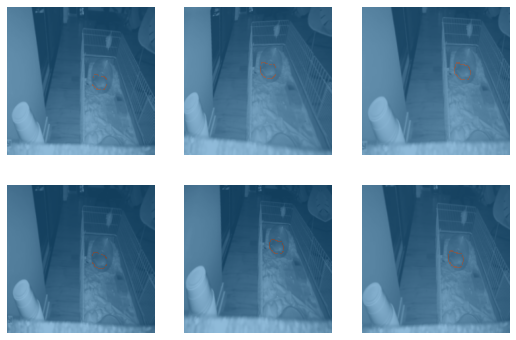

In [32]:
# %%
dls.show_batch(max_n=6, unique=True)

In [33]:
x, y = dls.one_batch()
x.shape, y.shape

(torch.Size([8, 3, 224, 224]), torch.Size([8, 224, 224]))

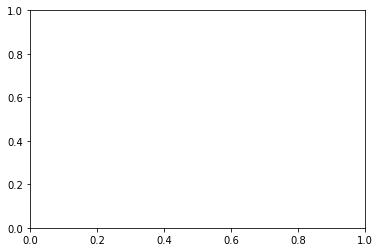

epoch,train_loss,valid_loss,time
0,0.029542,0.050157,00:19
1,0.025501,0.038125,00:19
2,0.022538,0.056515,00:20
3,0.019551,0.029166,00:19
4,0.020671,0.026416,00:19
5,0.018504,0.036164,00:19
6,0.015853,0.044028,00:19
7,0.014036,0.035249,00:19
8,0.012465,0.030148,00:19
9,0.011153,0.032253,00:19


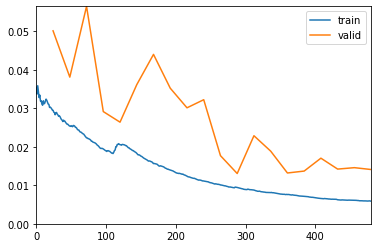

In [34]:
learn = unet_learner(dls, resnet34, cbs=ShowGraphCallback())
learn.fine_tune(20)

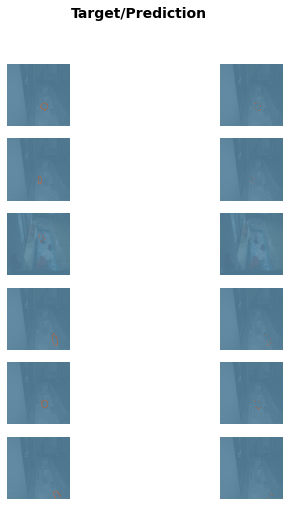

In [35]:
learn.show_results(max_n=6, figsize=(7,8))

In [36]:
from PIL import Image

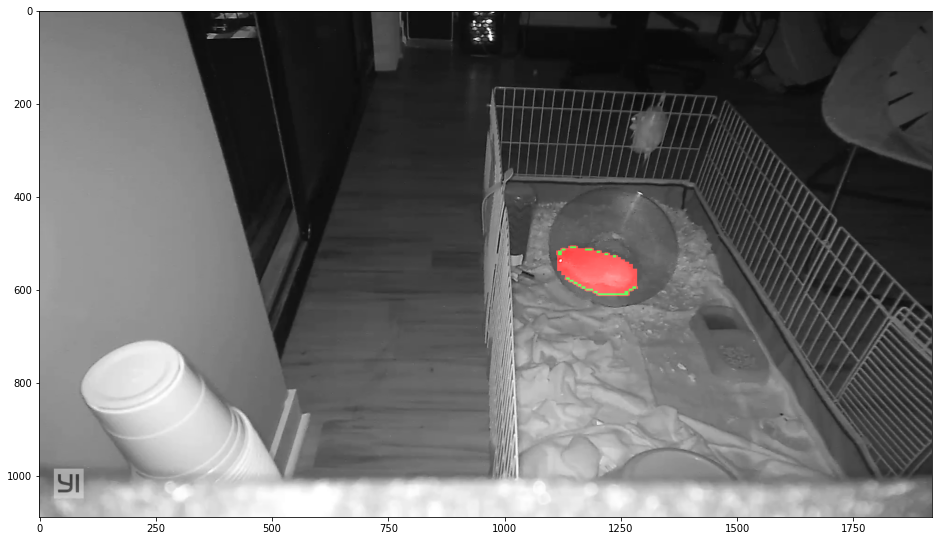

In [40]:
import matplotlib.pyplot as plt
out = learn.predict(fnames[0])
# %%
def show_res(fn):
  im = np.array(PILImage.create(fn))
  out = learn.predict(fn)[1]
  mask = np.array(Image.fromarray(out.numpy().astype(np.uint8)).resize((1920,1088)))
  im[mask==1, 0] = 255
  im[mask==2, 1] = 255
  f, axs = plt.subplots(1,1, figsize=(16,16))
  axs.imshow(im)

show_res(fnames[24])

In [41]:
from datetime import datetime
model_name = Path('models') / datetime.now().strftime("%Y%m%d_%H%M.pkl")

In [42]:
model_dir = model_name.parent
model_dir.mkdir(exist_ok=True)

In [43]:
learn.export(model_name)